# 线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
num=100         # 样本点个数
# n=            # 还可以修改X维度

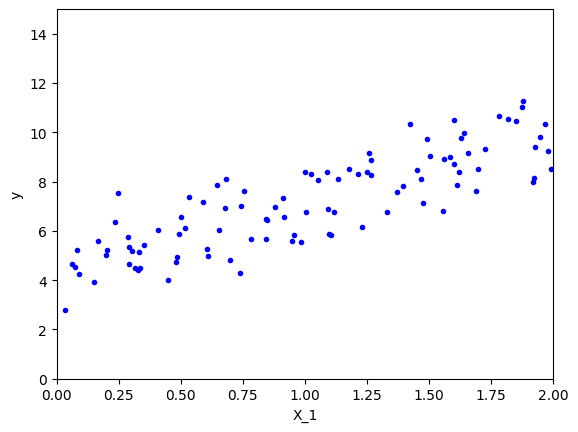

In [3]:
X=2*np.random.rand(num,1)
y=4+3*X+np.random.randn(num,1)

plt.plot(X,y,'b.')
plt.xlabel("X_1")
plt.ylabel("y")
plt.axis([0,2,0,15])
plt.show()

In [4]:
X_b = np.concatenate([np.ones((num,1),int),X],axis=1) 

# 由最小二乘法的结论，可以得到theta为
theta_beat=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
display(theta_beat)

array([[4.34371811],
       [2.79140233]])

array([[4.34371811],
       [9.92652278]])

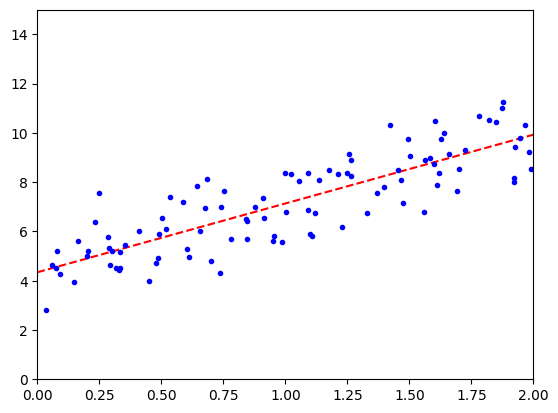

In [5]:
# 下面我们来验证结果

X_pred=np.array([[0],[2]])
X_b_pred=np.concatenate([np.ones((2,1)),X_pred],axis=1)
y_pred=X_b_pred.dot(theta_beat)
display(y_pred)

plt.plot(X_pred,y_pred,'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

## 梯度下降
* 在上面利用最小二乘法计算线性回归的过程中，有一步矩阵求逆，但是不是所有情况矩阵都能求逆的，这就限制了最小二乘法的运用
* 所以我们接下来研究机器学习的线性回归算法 ：梯度下降

In [6]:
from sklearn.linear_model import LinearRegression

# 实例化类对象
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

## 数据预处理
* 标准化
1. 由于x的取值范围不同，在迭代不同的theta时候，变化的幅度不一样，导致迭代速度变慢，所以在拿到数据之后先做数据的标准化

In [7]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(X)        # 创建缩放器
display(scaler)
display(scaler.mean_,scaler.scale_)
X_scale=scaler.transform(X)

# 或者同时完成拟合和转换
# X_scale=scaler.fit_transform(X)

X_b_scale=np.concatenate([np.ones((num,1),int),X_scale],axis=1)
# display(X_b_scale)

StandardScaler()

array([1.00873629])

array([0.57621957])

## 批量梯度下降

array([[4.34371773],
       [2.79140265]])

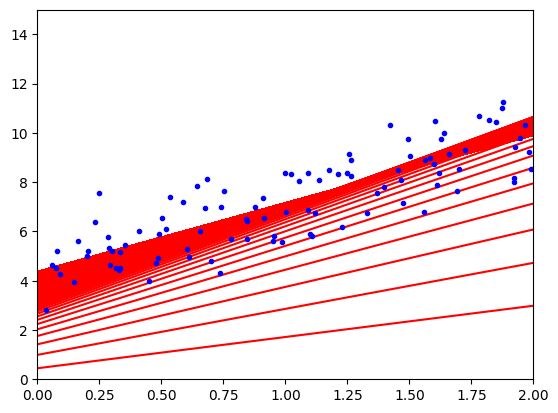

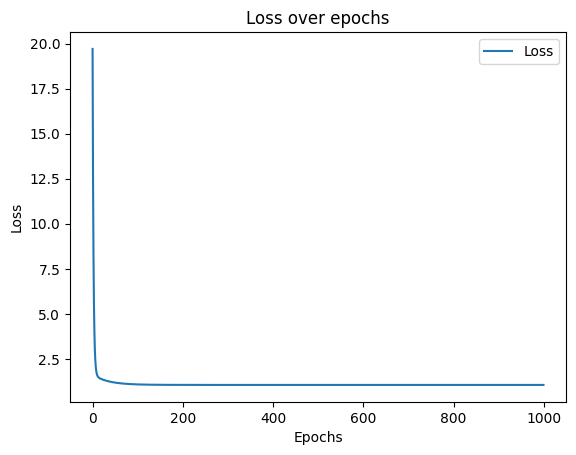

[np.float64(1.0539636770901712), np.float64(1.05396367709017), np.float64(1.0539636770901688), np.float64(1.0539636770901675), np.float64(1.0539636770901664)]


In [8]:
# 学习率
eta=0.1
# 迭代次数
n_iterations=1000
# 使用样本数
m=100
np.random.seed(int(time.time()))
# 随机初始化待求参数
theta=np.random.randn(2,1)

losses=[]

for iteration in range(n_iterations):
    
    # 画出迭代变化
    y_pred=X_b_pred.dot(theta)
    plt.plot(X_pred,y_pred,'r-')

    # 下降梯度
    gradients= 1/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

     # 计算并记录损失  
    y_pred = X_b.dot(theta)  
    loss = np.mean((y_pred - y) ** 2)  # 均方误差  
    losses.append(loss) 

display(theta)

plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

# 绘制损失变化  
plt.plot(range(n_iterations), losses, label='Loss')  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.title('Loss over epochs')  
plt.legend()  
plt.show()  

print(losses[-5:])


## 随机梯度下降

array([[4.32572247],
       [2.78724365]])

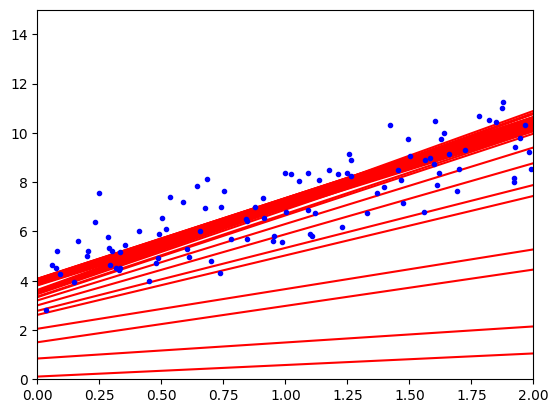

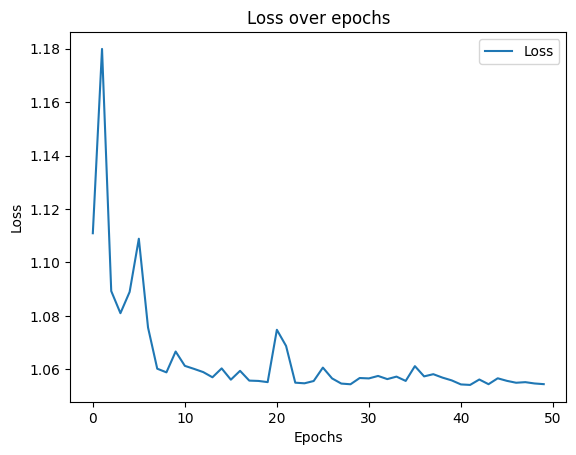

[np.float64(1.0556957798693072), np.float64(1.0549875355133975), np.float64(1.055208886460162), np.float64(1.0547174222374291), np.float64(1.054461844493121)]


In [9]:
# theta_path_sdg=[]
m=len(X_b)
# 迭代次数
n_epochs=50
# 随机初始化待求参数
theta=np.random.randn(2,1)
np.random.seed(int(time.time()))

# 学习率衰减策略，迭代到后面学习率逐渐变小
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)

losses=[]

for epoch in range(n_epochs):
    for i in range(m):
        # 画出迭代变化
        if i<20 and epoch<3:
            y_pred=X_b_pred.dot(theta)
            plt.plot(X_pred,y_pred,'r-')
            
        # 随机取样进行学习
        random_index=np.random.randint(0,m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index]
        # 计算下降梯度
        gradients= xi.T*(xi.dot(theta)-yi)
        # 计算学习率
        eta=learning_schedule(epoch*m+i)
        # 更新参数
        theta = theta - eta * gradients
     # 计算并记录损失  
    y_pred = X_b.dot(theta)  
    loss = np.mean((y_pred - y) ** 2)  # 均方误差  
    losses.append(loss) 

display(theta)

plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

# 绘制损失变化  
plt.plot(range(n_epochs), losses, label='Loss')  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.title('Loss over epochs')  
plt.legend()  
plt.show()  

print(losses[-5:])


## 小批量梯度下降

array([[4.40495662],
       [2.67718484]])

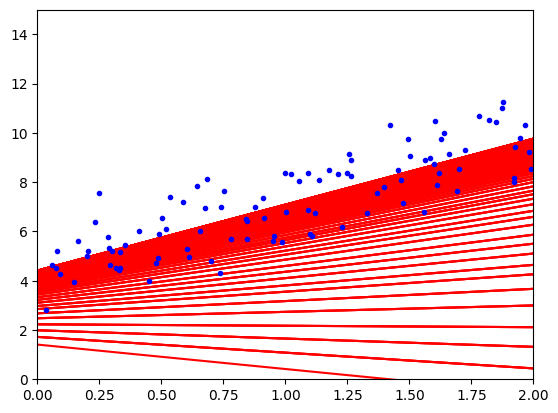

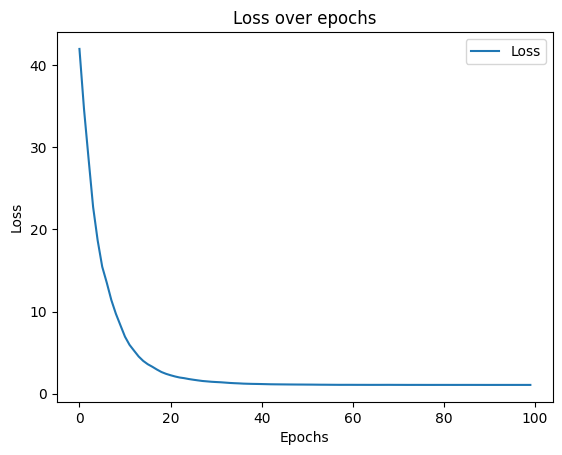

[np.float64(1.0618044067283048), np.float64(1.0621738428194805), np.float64(1.0618872891910842), np.float64(1.0616399137002375), np.float64(1.0612087045748593)]


In [10]:
# 迭代次数
n_epochs=100
# 选取样本数
minibatch=40
m=len(y)
# 学习率衰减策略，迭代到后面学习率逐渐变小
t0,t1,t=5,100,0
def learning_schedule(t):
    return t0/(t+t1)
# 设定时间种子
np.random.seed(int(time.time()))
# 随机初始化待求参数
theta=np.random.randn(2,1)

# 记录损失  
losses = [] 


for epoch in range(n_epochs):
    np.random.seed(int(time.time())+epoch)
    # 选择部分样本
    random_index=np.random.permutation(range(m))
    for i in range(0,m,minibatch):
        t+=1
        # 画出迭代变化
        y_pred=X_b_pred.dot(theta)
        plt.plot(X_pred,y_pred,'r-')

        random_index=random_index[i:i+minibatch]
        xi=X_b[random_index]
        yi=y[random_index]
        # 下降梯度
        gradients= 1/minibatch * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

        # 计算并记录损失  
    y_pred = X_b.dot(theta)  
    loss = np.mean((y_pred - y) ** 2)  # 均方误差  
    losses.append(loss) 

display(theta)

plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

# 绘制损失变化  
plt.plot(range(n_epochs), losses, label='Loss')  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.title('Loss over epochs')  
plt.legend()  
plt.show()  

print(losses[-5:])

## 多项式回归

[[1.11935184 0.45627941]]
[0.17923015]


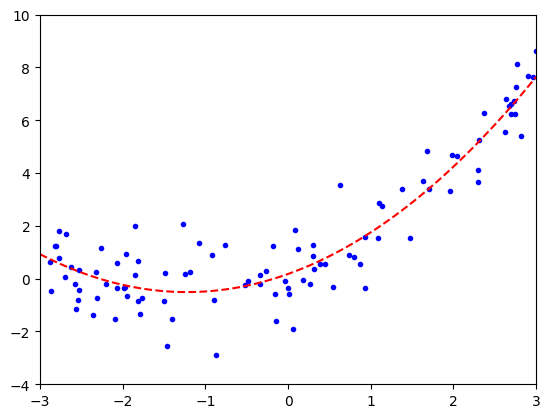

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# 构造数据
m=100       # 样本数
X=6*np.random.rand(m,1)-3
y=0.5* X**2 + X + np.random.randn(m,1)

# degree为最高次，include_bias 常数项,interaction_onlybool 有没有交叉项
poly_feature=PolynomialFeatures(degree=2,include_bias=False)
X_feature=poly_feature.fit_transform(X)
# 得到【x，x^2】

# 利用线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_feature,y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

X_new=np.linspace(-3,3,100).reshape(100,1)
X_feature_new=poly_feature.transform(X_new)
y_feature_pred=lin_reg.predict(X_feature_new)
plt.plot(X,y,'b.')
plt.plot(X_new,y_feature_pred,'r--')
plt.axis([-3,3,-4,10])
plt.show()

# 正则化
对权重参数进行惩罚，让权重参数变化平滑一些
1. 岭回归
2. lasso